In [1]:
library(tidyverse)  # data manipulation
library(readr)      # data reading
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’




In [2]:
setwd('/home/andrea/Cellulose')
rm(list = ls())

In [3]:
suppressWarnings(ASHDOWN_2 <- read_csv("Southern_pine_lot_1.csv"))
ASHDOWN_2$X1 <- NULL
suppressWarnings(ASHDOWN_4 <- read_csv("Southern_pine_lot_2.csv"))
ASHDOWN_4$X1 <- NULL
suppressWarnings(BETULA <- read_csv("Birch.csv"))
BETULA$X1 <- NULL
suppressWarnings(ENCELB <- read_csv("Eucaliptus.csv"))
ENCELB$X1 <- NULL
suppressWarnings(ENCEPW <- read_csv("Eucaliptus_mixed.csv"))
ENCEPW$X1 <- NULL
suppressWarnings(KLABIN <- read_csv("KLABIN.csv"))
KLABIN$X1 <- NULL
suppressWarnings(SCA <- read_csv("SCA.csv"))
SCA$X1 <- NULL
suppressWarnings(SICEM <- read_csv("SICEM.csv"))
SICEM$X1 <- NULL
suppressWarnings(ROSE <- read_csv("ROSE.csv"))
ROSE$X1 <- NULL

Parsed with column specification:
cols(
  X1 = col_double(),
  Taxid = col_double(),
  Name = col_character(),
  OTU = col_double(),
  Perc = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  Taxid = col_double(),
  Name = col_character(),
  OTU = col_double(),
  Perc = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  Taxid = col_double(),
  Name = col_character(),
  OTU = col_double(),
  Perc = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  Taxid = col_double(),
  Name = col_character(),
  OTU = col_double(),
  Perc = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  Taxid = col_double(),
  Name = col_character(),
  OTU = col_double(),
  Perc = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  Taxid = col_double(),
  Name = col_character(),
  OTU = col_double(),
  Perc = col_double()
)

Parsed with column specification:
cols(
  X1 = col_d

In [4]:
ASHDOWN_2_SUB <- subset(ASHDOWN_2, select = c('Name', 'OTU'))
# BC <- merge(BC, ASHDOWN_2_SUB, by = 'Name', all = TRUE)
BC <- ASHDOWN_2_SUB
names(BC)[names(BC) == 'OTU'] <- 'Southern pine lot 1'

ASHDOWN_4_SUB <- subset(ASHDOWN_4, select = c('Name', 'OTU'))
BC <- merge(BC,ASHDOWN_4_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'Southern pine lot 2'

BETULA_SUB <- subset(BETULA, select = c('Name', 'OTU'))
BC <- merge(BC,BETULA_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'Birch'

ENCELB_SUB <- subset(ENCELB, select = c('Name', 'OTU'))
BC <- merge(BC,ENCELB_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'Eucaliptus'

ENCEPW_SUB <- subset(ENCEPW, select = c('Name', 'OTU'))
BC <- merge(BC,ENCEPW_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'Eucaliptus Mixed'

KLABIN_SUB <- subset(KLABIN, select = c('Name', 'OTU'))
BC <- merge(BC,KLABIN_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'Klabin'

SCA_SUB <- subset(SCA, select = c('Name', 'OTU'))
BC <- merge(BC,SCA_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'CTMP SCA'

SICEM_SUB <- subset(SICEM, select = c('Name', 'OTU'))
BC <- merge(BC,SICEM_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'Sicem'

ROSE_SUB <- subset(ROSE, select = c('Name', 'OTU'))
BC <- merge(BC,ROSE_SUB, by = 'Name', all = TRUE)
names(BC)[names(BC) == 'OTU'] <- 'Rosenthal TCF'

In [5]:
BC[is.na(BC)] <- 0.0
BC$Name <- NULL
BCT <- t(BC)
BCT_sc <- as.data.frame(scale(BCT))

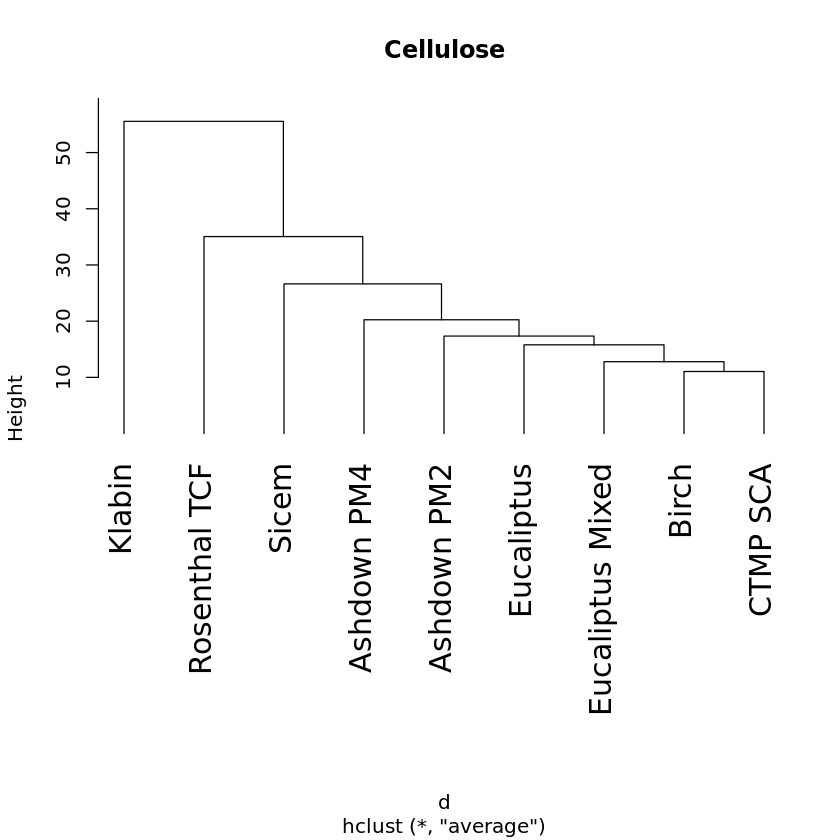

In [6]:
# Dissimilarity matrix
d <- dist(BCT_sc, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "average" )

# Plot the obtained dendrogram
plot(hc1, cex = 1.5, hang = -1, main = 'Cellulose')

[1] 0.6229296

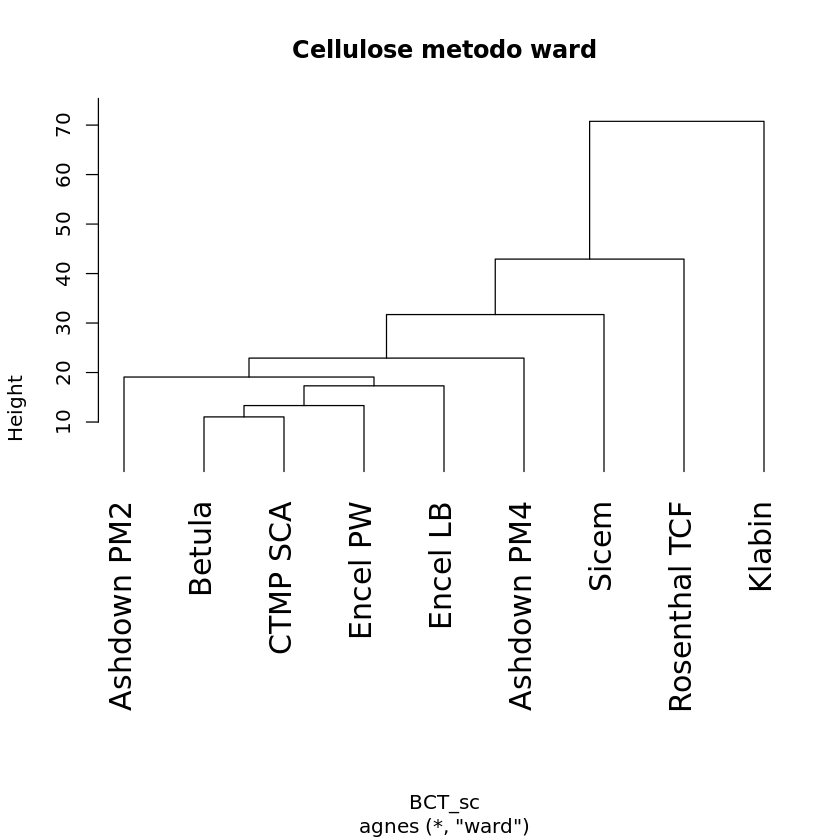

In [7]:
# best method
m <- c( "average", "single", "complete", "ward", "weighted")
max_i <- NULL
max_ac <- 0
for (i in m) {
  # print(i)
  hclust_avg <- agnes(BCT_sc, method = i)
  # print(hclust_avg$ac)
  # max_ac
  if (hclust_avg$ac > max_ac) {
    max_ac <- hclust_avg$ac
    max_i <- i
  }
}
# max_ac
# max_i
hclust_avg <- agnes(BCT_sc, method = max_i)
hclust_avg$ac
pltree(hclust_avg, cex = 1.5, hang = -1, , main = paste('Cellulose metodo', max_i))

[1] 0.5796667

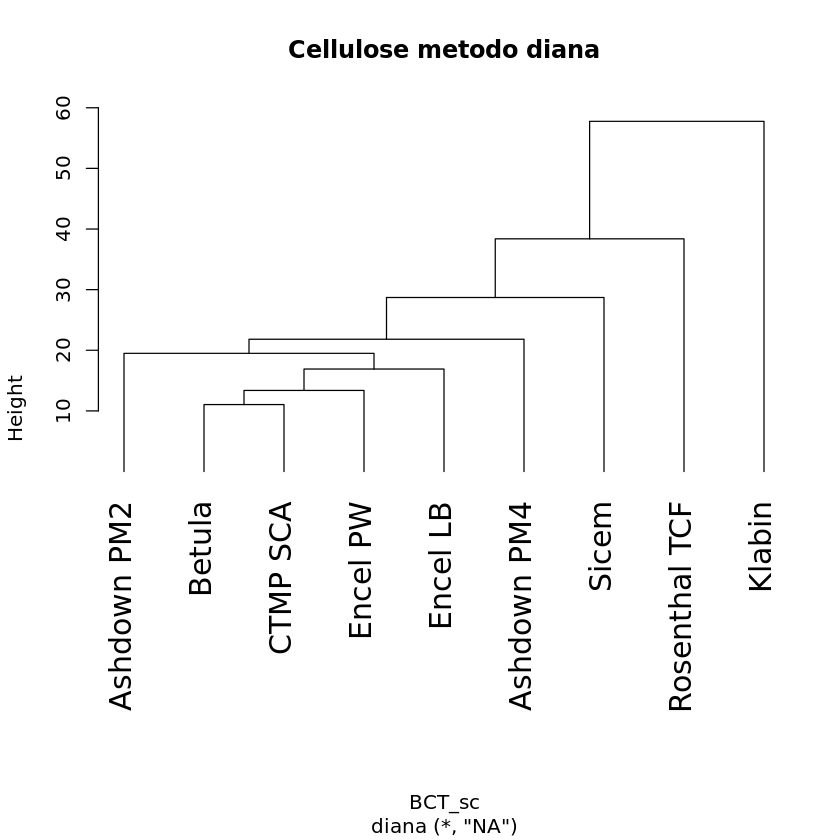

In [8]:
# diana
hclust_avg <- diana(BCT_sc)
hclust_avg$dc
pltree(hclust_avg, cex = 1.5, hang = -1, , main = 'Cellulose metodo diana')

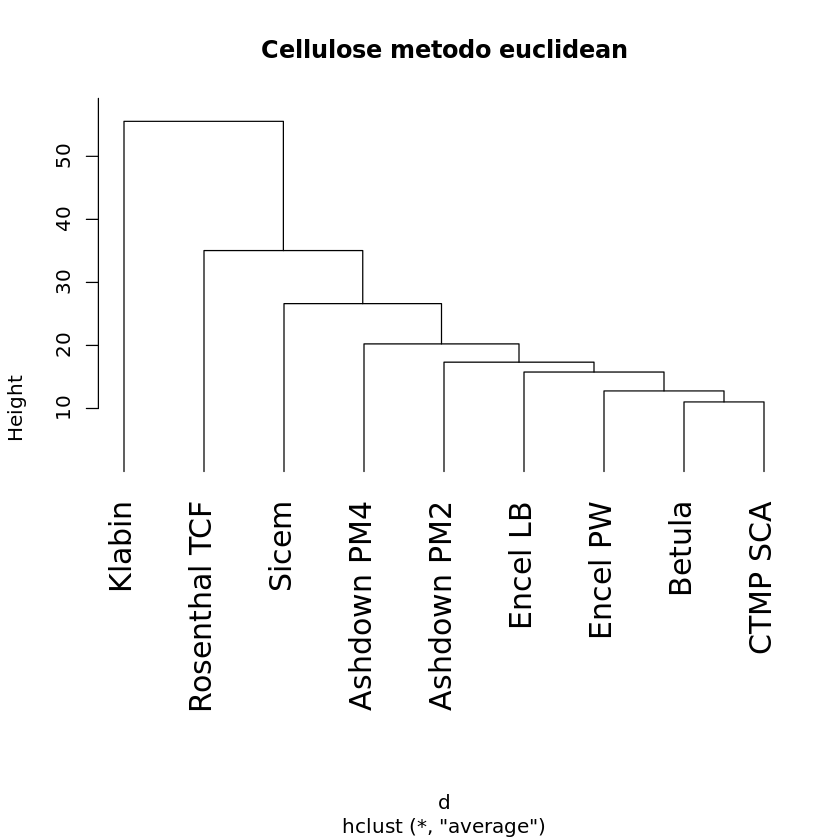

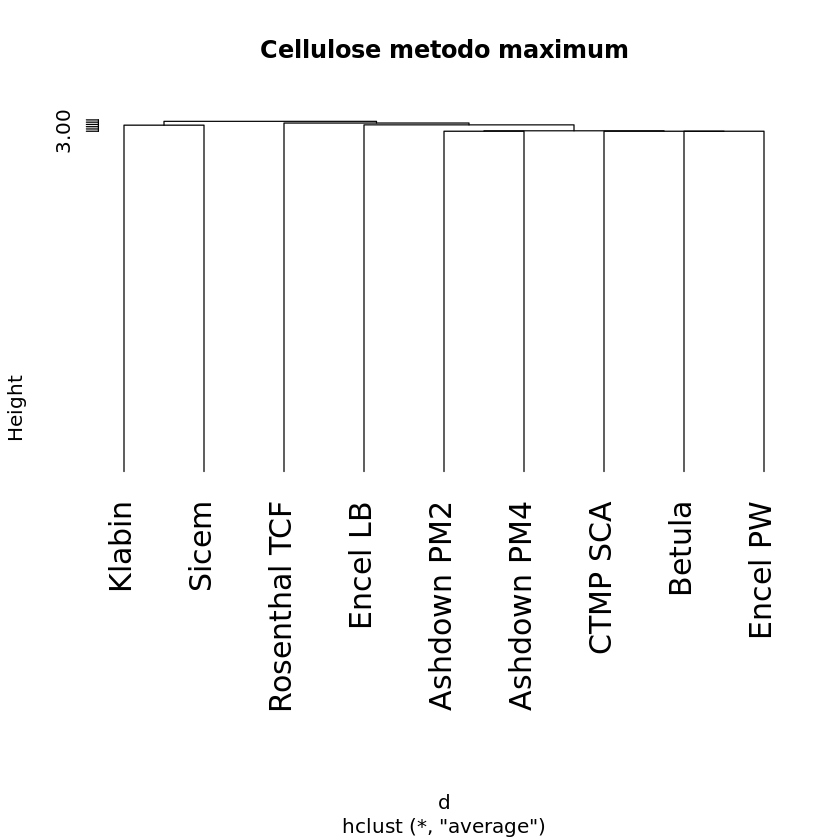

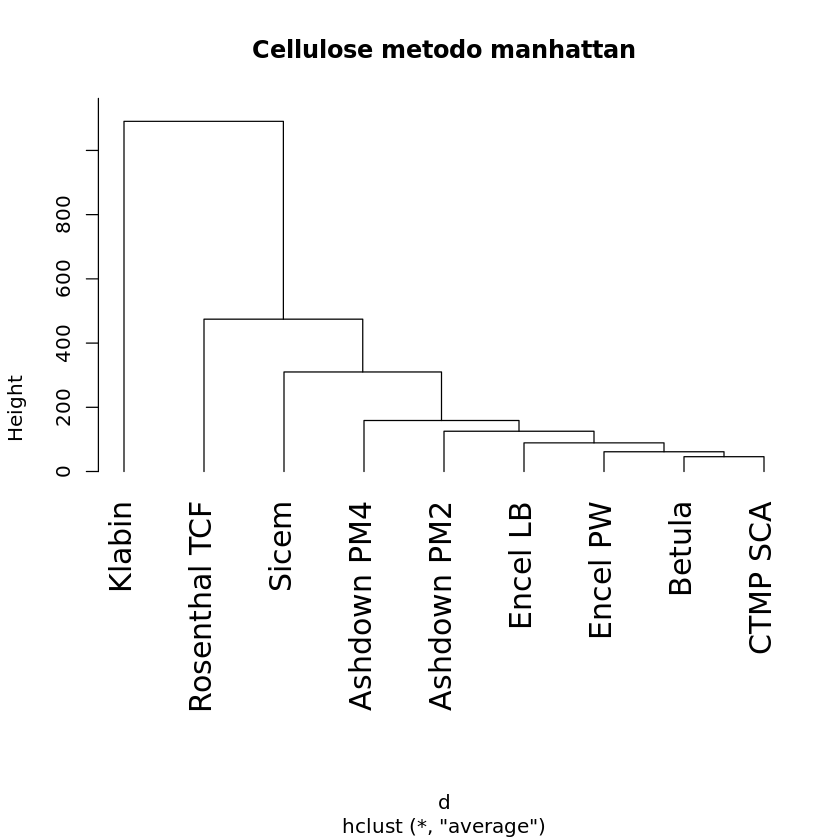

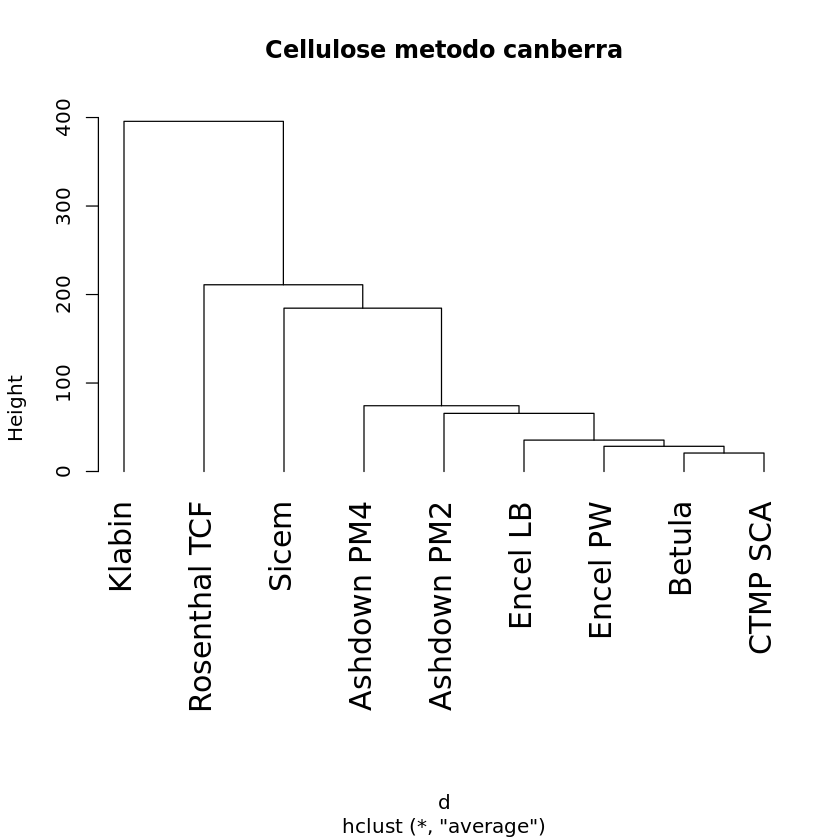

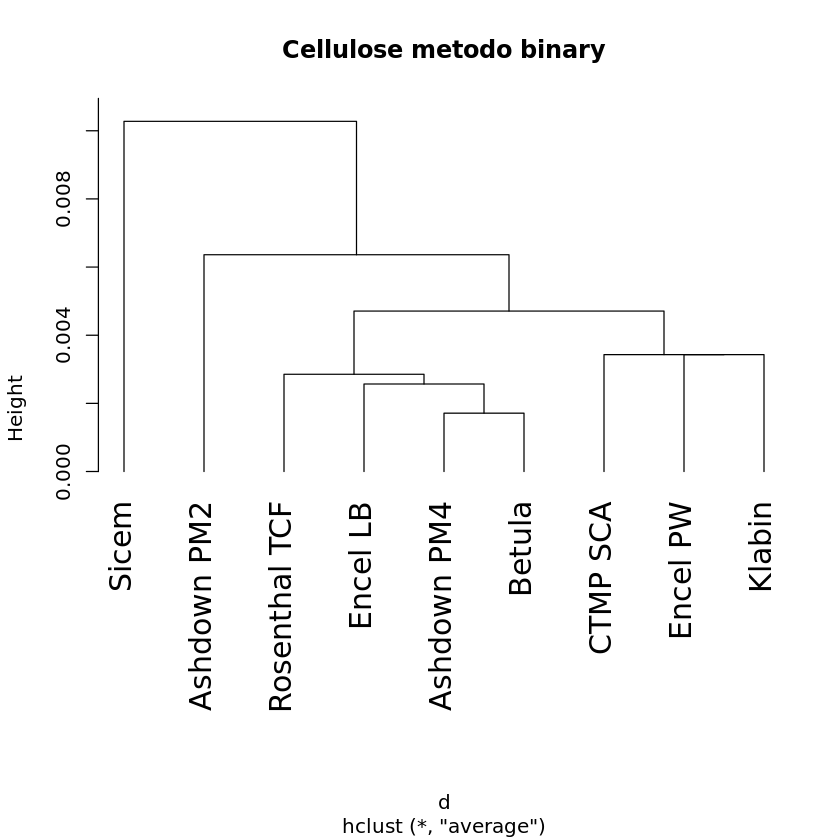

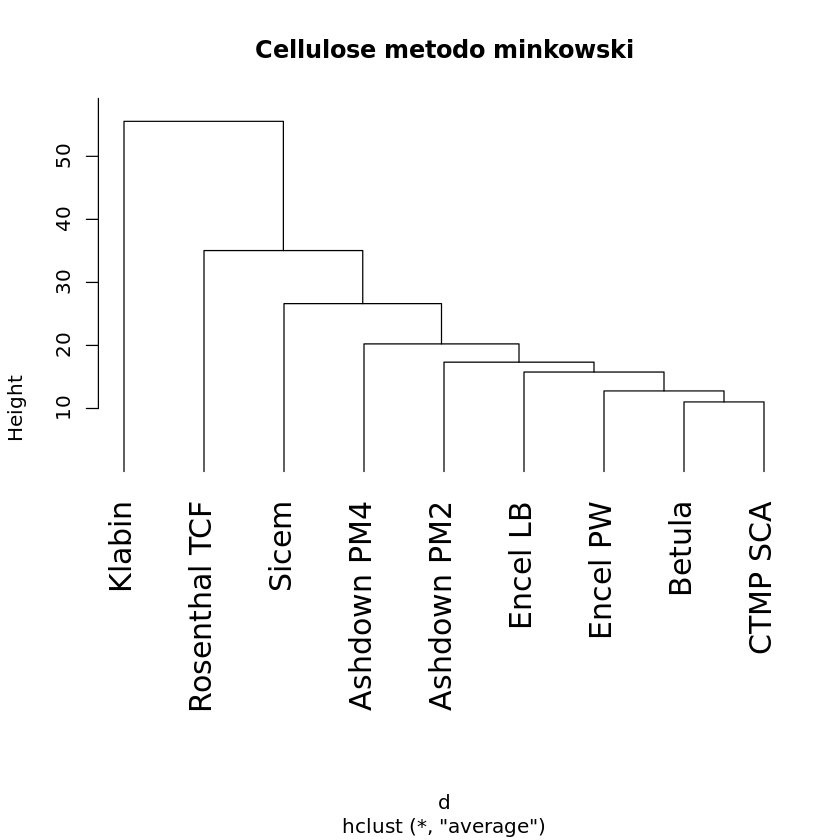

In [9]:
# excursus on methods
m <- c("euclidean", "maximum", "manhattan", "canberra", "binary", "minkowski")
for(me in m){
  d <- dist(BCT_sc, method = me)
  hc1 <- hclust(d, method = "average" )
  plot(hc1, cex = 1.5, hang = -1, main = paste('Cellulose metodo', me))
}

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V576,V577,V578,V579,V580,V581,V582,V583,V584,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.3333333,-0.3333333,-0.3333333,0.3333333,-0.3333333,-0.3333333,-0.5525312,-0.3333333,1.054093,-0.3333333,⋯,-0.4714045,-0.3333333,2.6666667,2.6666667,-0.3333333,0.7647191,-0.3333333,-0.711660,-0.3333333,1
2,2.6666667,-0.3333333,-0.3333333,2.5833333,2.6666667,-0.3333333,-0.2837322,-0.3333333,1.054093,-0.3333333,⋯,-0.4714045,-0.3333333,-0.3333333,-0.3333333,-0.3333333,-0.6117753,-0.3333333,1.118323,-0.3333333,1
3,-0.3333333,-0.3333333,-0.3333333,-0.4166667,-0.3333333,-0.3333333,-0.5525312,-0.3333333,-0.843274,-0.3333333,⋯,-0.4714045,-0.3333333,-0.3333333,-0.3333333,-0.3333333,-0.6117753,-0.3333333,-0.711660,-0.3333333,1
4,-0.3333333,-0.3333333,-0.3333333,-0.4166667,-0.3333333,2.6666667,2.5386569,2.6666667,-0.843274,-0.3333333,⋯,-0.4714045,-0.3333333,-0.3333333,-0.3333333,-0.3333333,-0.6117753,-0.3333333,-0.711660,-0.3333333,1
5,-0.3333333,-0.3333333,-0.3333333,-0.4166667,-0.3333333,-0.3333333,-0.2837322,-0.3333333,-0.843274,-0.3333333,⋯,-0.4714045,-0.3333333,-0.3333333,-0.3333333,-0.3333333,-0.6117753,-0.3333333,-0.711660,-0.3333333,1
6,-0.3333333,-0.3333333,-0.3333333,-0.4166667,-0.3333333,-0.3333333,-0.5525312,-0.3333333,-0.843274,2.6666667,⋯,2.3570226,2.6666667,-0.3333333,-0.3333333,2.6666667,2.1412135,-0.3333333,2.033314,2.6666667,2


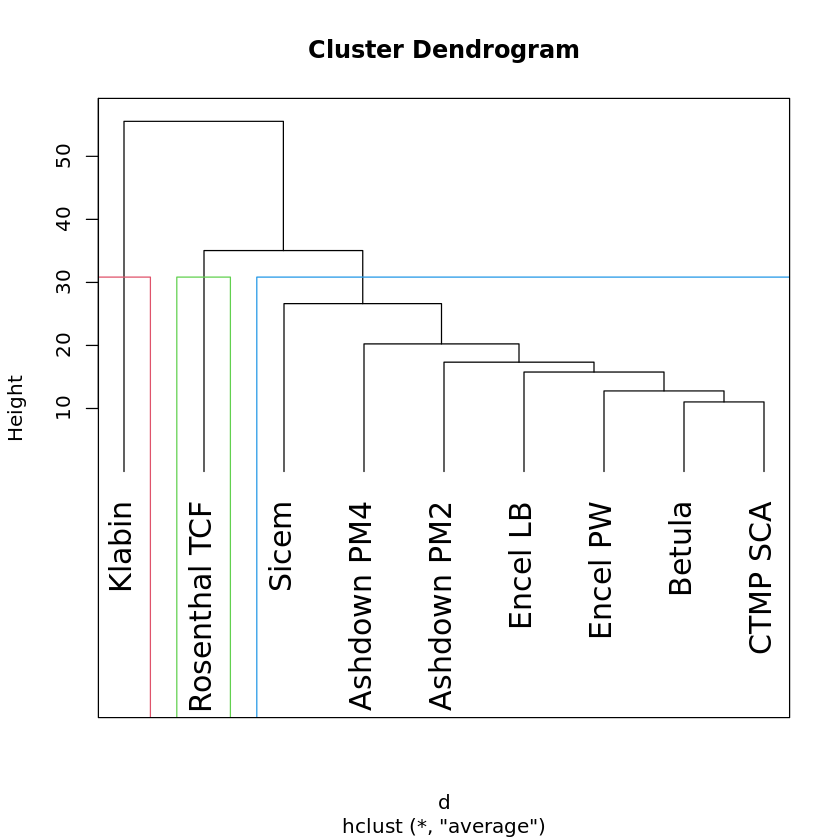

In [13]:
d <- dist(BCT_sc, method = "euclidean")
hc1 <- hclust(d, method = "average" )
sub_grp <- cutree(hc1, k = 3)
BCT_sc %>%
    mutate(cluster = sub_grp) %>%
    head
plot(hc1, cex = 1.5, hang = -1)
rect.hclust(hc1, k = 3, border = 2:5)
box(which = "plot", lty = "solid")

Too few points to calculate an ellipse

Too few points to calculate an ellipse



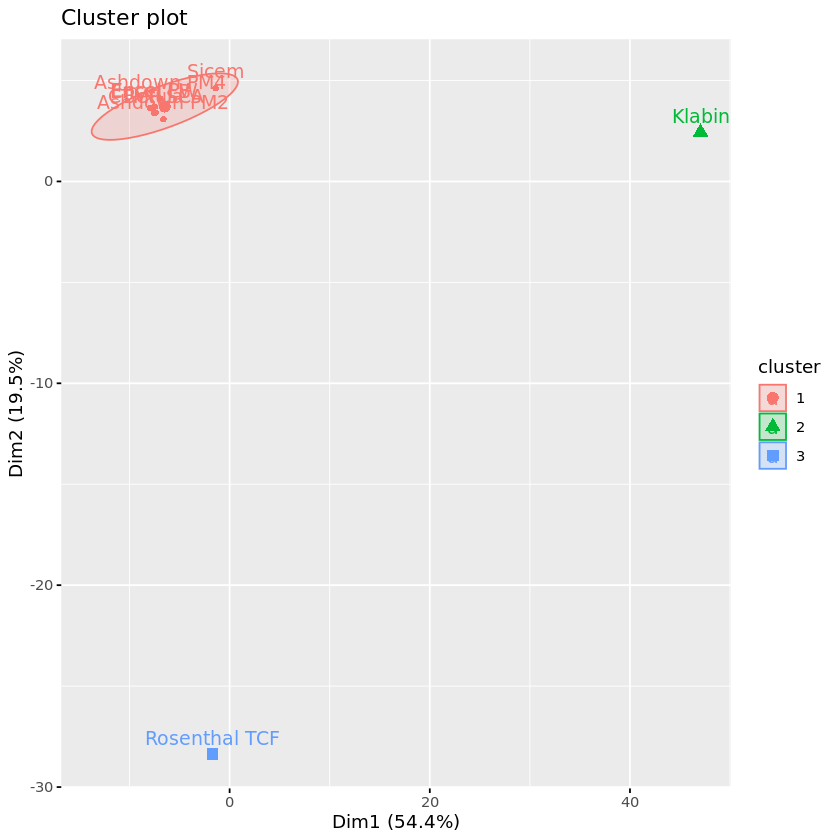

In [15]:
fviz_cluster(list(data = BCT_sc, cluster = sub_grp), ellipse = TRUE, ellipse.type = "norm")